#31. Calcule la latitud y longitud promedio de los contenidos con referencias en la tierra y diga dónde está eso (⭐⭐)

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=0318f0e4d8868fc8ba929930d72dd08a3c2afcacd64a9ff75a4ad4022655677e
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operatio

In [ ]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create the Spark Session
spark = SparkSession.builder.getOrCreate()

# create the Spark Context
sc = spark.sparkContext

In [ ]:
df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/drive/MyDrive/Datasets/geo_tags.csv')

In [ ]:
geo_tags_rdd = df.rdd

In [ ]:
geo_tags_rdd

MapPartitionsRDD[14] at javaToPython at NativeMethodAccessorImpl.java:0

In [ ]:
geo_tags_rdd.getNumPartitions()

2

In [ ]:
geo_tags_rdd.take(5)

[Row(gt_id='158041', gt_page_id=4328020, gt_globe='earth', gt_primary=0, gt_lat=41.50749969, gt_lon=-5.81750011, gt_dim=1000, gt_type=None, gt_name=None, gt_country=None, gt_region=None),
 Row(gt_id='5844377', gt_page_id=4670424, gt_globe='earth', gt_primary=0, gt_lat=13.73799992, gt_lon=-89.29199982, gt_dim=10000, gt_type='city', gt_name=None, gt_country=None, gt_region=None),
 Row(gt_id='5844381', gt_page_id=4670424, gt_globe='earth', gt_primary=0, gt_lat=13.70199966, gt_lon=-89.20800018, gt_dim=10000, gt_type='city', gt_name=None, gt_country=None, gt_region=None),
 Row(gt_id='5844383', gt_page_id=4670424, gt_globe='earth', gt_primary=0, gt_lat=13.39999962, gt_lon=-89.75, gt_dim=10000, gt_type='city', gt_name=None, gt_country=None, gt_region=None),
 Row(gt_id='5844388', gt_page_id=4670424, gt_globe='earth', gt_primary=0, gt_lat=12.85000038, gt_lon=-88.0, gt_dim=10000, gt_type='city', gt_name=None, gt_country=None, gt_region=None)]

Filtro para solo trabajar con los datos en la Tierra.

In [ ]:
geo_tags_earth_rdd = geo_tags_rdd.filter(lambda x: x[2] == 'earth')

Calculo la suma de latitud, la suma de longitud y el total de los datos, para poder sacar el promedio después.

In [ ]:
lat_total, long_total, total = geo_tags_earth_rdd.map(lambda x: (x[4], x[5], 1)).reduce(lambda a,b: (a[0] + b[0] ,a[1] + b[1], a[2] + b[2]))

In [ ]:
lat_promedio = lat_total / total
long_promedio = long_total / total

In [ ]:
lat_promedio

32.353382400123635

In [ ]:
long_promedio

-24.665538716943857

Uso cartopy y matplotlib para poder mostrar en un mapa donde es el promedio de latitud y longitud.

In [ ]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 57.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.4 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102756 sha256=3a7a03947577bf86af2ea71aa4db4cb6ea4e1ee4aeb2ff0056d9ab6ea5405803
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


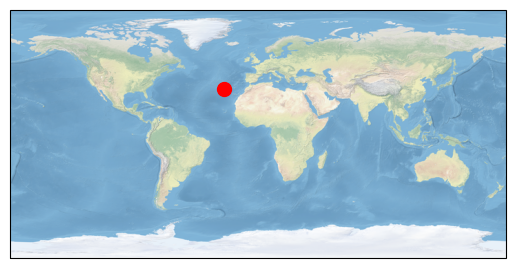

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.stock_img()
ax.plot(long_promedio, lat_promedio, 'ro', markersize=10, transform=ccrs.PlateCarree())
plt.show()